<a href="https://colab.research.google.com/github/nicolez9911/colab/blob/main/03_StudentlMDBExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Original model**

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

from tensorflow.keras import regularizers

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

#Multi-hot encoding of words into vectors
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 7s 79ms/step - loss: 0.5424 - accuracy: 0.7599 - val_loss: 0.4186 - val_accuracy: 0.8554
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3369 - accuracy: 0.8896 - val_loss: 0.3306 - val_accuracy: 0.8761
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2532 - accuracy: 0.9131 - val_loss: 0.2826 - val_accuracy: 0.8905
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2014 - accuracy: 0.9331 - val_loss: 0.2970 - val_accuracy: 0.8796
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1681 - accuracy: 0.9443 - val_loss: 0.2795 - val_accuracy: 0.8897
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1459 - accuracy: 0.9519 - val_loss: 0.3077 - val_accuracy: 0.8780
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1244 - accuracy: 0.9613 - val_loss: 0.3340 - val_accuracy: 0.8727
Epoch 8/20
30

In [3]:
import matplotlib.pyplot as plt

def generate_plot(history):
  # Plot training history (loss and accuracy)
  plt.figure(figsize=(12, 5))

  # Plot training & validation loss
  plt.subplot(1, 2, 1)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.title('Training and Validation Loss')

  # Plot training & validation accuracy
  plt.subplot(1, 2, 2)
  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.title('Training and Validation Accuracy')

  plt.tight_layout()
  return plt


**1. Version of the model with lower capacity (plot results)**

Epoch 1/20
30/30 [==============================] - 3s 65ms/step - loss: 0.6160 - accuracy: 0.7327 - val_loss: 0.5457 - val_accuracy: 0.7869
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4909 - accuracy: 0.8568 - val_loss: 0.4582 - val_accuracy: 0.8674
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4024 - accuracy: 0.8920 - val_loss: 0.3990 - val_accuracy: 0.8597
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3359 - accuracy: 0.9058 - val_loss: 0.3578 - val_accuracy: 0.8813
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2868 - accuracy: 0.9187 - val_loss: 0.3209 - val_accuracy: 0.8867
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2498 - accuracy: 0.9273 - val_loss: 0.3014 - val_accuracy: 0.8884
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2204 - accuracy: 0.9342 - val_loss: 0.2876 - val_accuracy: 0.8922
Epoch 8/20
30

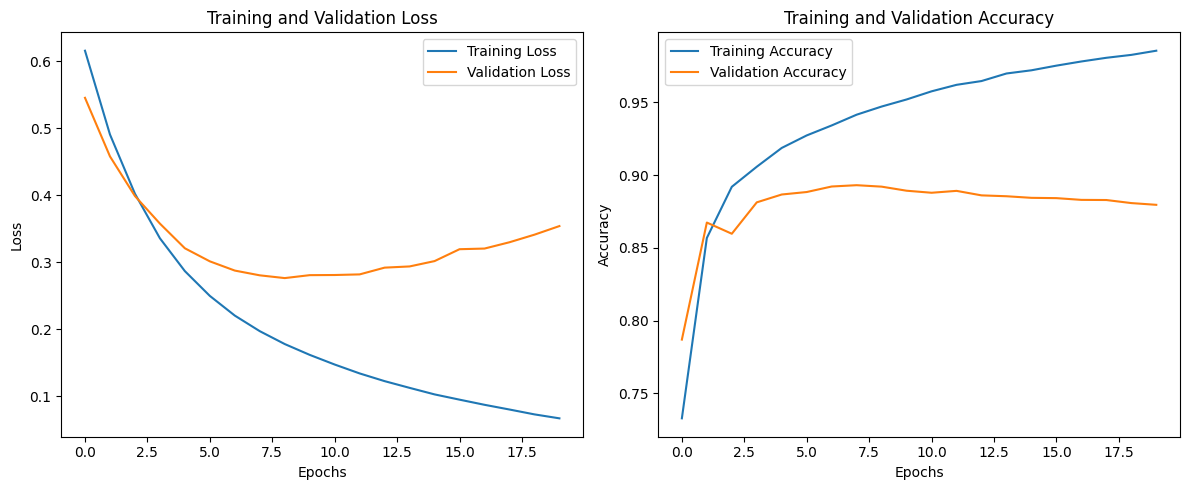

In [4]:
model_1 = keras.Sequential([
    keras.layers.Dense(4, activation="relu"),
    keras.layers.Dense(4, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])
model_1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model_1.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

plt = generate_plot(history_original)
plt.show()

**2. Version of the model with higher capacity (plot results)**

Epoch 1/20
30/30 [==============================] - 3s 66ms/step - loss: 0.5735 - accuracy: 0.7522 - val_loss: 0.4790 - val_accuracy: 0.8522
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3990 - accuracy: 0.8853 - val_loss: 0.3746 - val_accuracy: 0.8737
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3084 - accuracy: 0.9097 - val_loss: 0.3250 - val_accuracy: 0.8837
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2517 - accuracy: 0.9271 - val_loss: 0.2991 - val_accuracy: 0.8874
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2112 - accuracy: 0.9383 - val_loss: 0.2821 - val_accuracy: 0.8904
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1820 - accuracy: 0.9459 - val_loss: 0.2823 - val_accuracy: 0.8883
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1610 - accuracy: 0.9522 - val_loss: 0.2767 - val_accuracy: 0.8887
Epoch 8/20
30

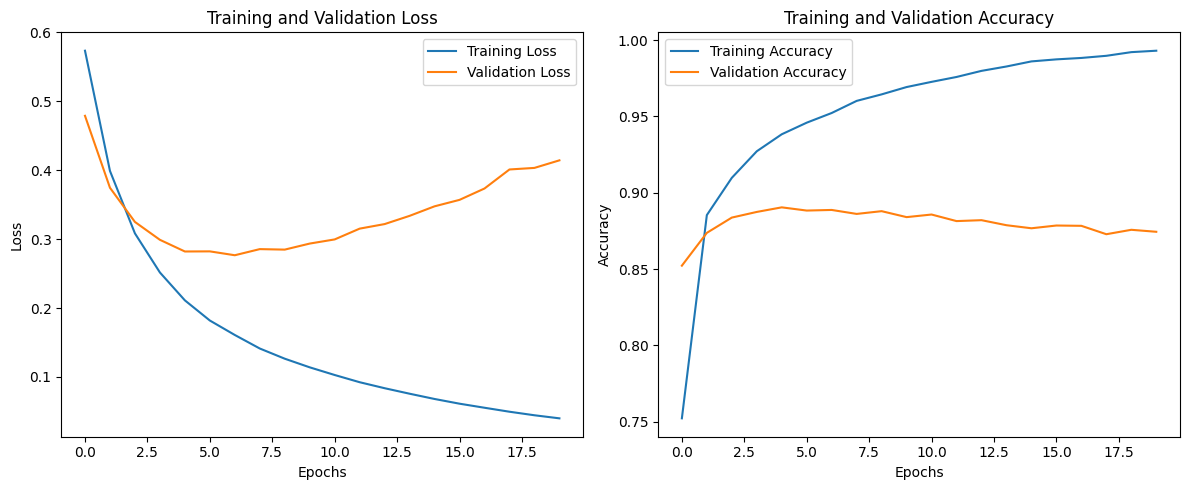

In [13]:
model_2 = keras.Sequential([
    keras.layers.Dense(4, activation="relu"),
    keras.layers.Dense(4, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])
model_2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model_2.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

plt = generate_plot(history_original)
plt.show()

#### Adding weight regularization

**3. Adding L2 weight regularization to the model (plot results)**

Epoch 1/20
30/30 [==============================] - 3s 68ms/step - loss: 0.6411 - accuracy: 0.7675 - val_loss: 0.5099 - val_accuracy: 0.8632
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.4415 - accuracy: 0.8851 - val_loss: 0.4138 - val_accuracy: 0.8782
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3600 - accuracy: 0.9045 - val_loss: 0.4118 - val_accuracy: 0.8658
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3222 - accuracy: 0.9157 - val_loss: 0.3763 - val_accuracy: 0.8816
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2973 - accuracy: 0.9251 - val_loss: 0.3666 - val_accuracy: 0.8855
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2812 - accuracy: 0.9324 - val_loss: 0.3759 - val_accuracy: 0.8807
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2673 - accuracy: 0.9366 - val_loss: 0.4061 - val_accuracy: 0.8679
Epoch 8/20
30

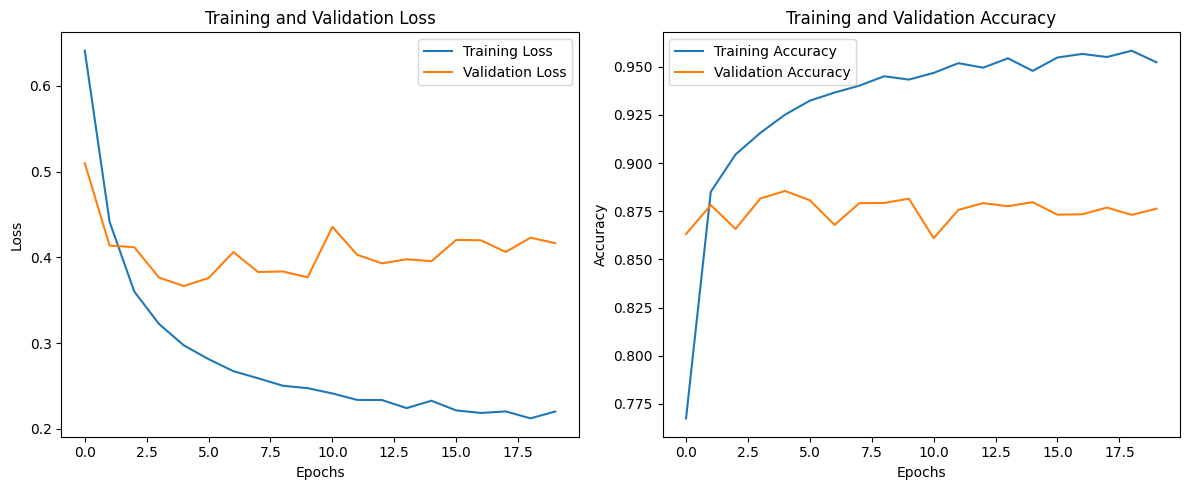

In [6]:
model_3 = keras.Sequential([
    keras.layers.Dense(16,
                       kernel_regularizer=regularizers.l2(0.002),
                       activation="relu"),
    keras.layers.Dense(16,
                       kernel_regularizer=regularizers.l2(0.002),
                       activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])
model_3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model_3.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

plt = generate_plot(history_original)
plt.show()

####Adding dropout

**4.  Adding dropout to the IMDB model (plot results)**

Epoch 1/20
30/30 [==============================] - 3s 65ms/step - loss: 0.6695 - accuracy: 0.7064 - val_loss: 0.5149 - val_accuracy: 0.8604
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5001 - accuracy: 0.8339 - val_loss: 0.4518 - val_accuracy: 0.8484
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4233 - accuracy: 0.8725 - val_loss: 0.3865 - val_accuracy: 0.8794
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3788 - accuracy: 0.8934 - val_loss: 0.3894 - val_accuracy: 0.8714
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3416 - accuracy: 0.9063 - val_loss: 0.3567 - val_accuracy: 0.8844
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3171 - accuracy: 0.9140 - val_loss: 0.3530 - val_accuracy: 0.8894
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2987 - accuracy: 0.9220 - val_loss: 0.3579 - val_accuracy: 0.8864
Epoch 8/20
30

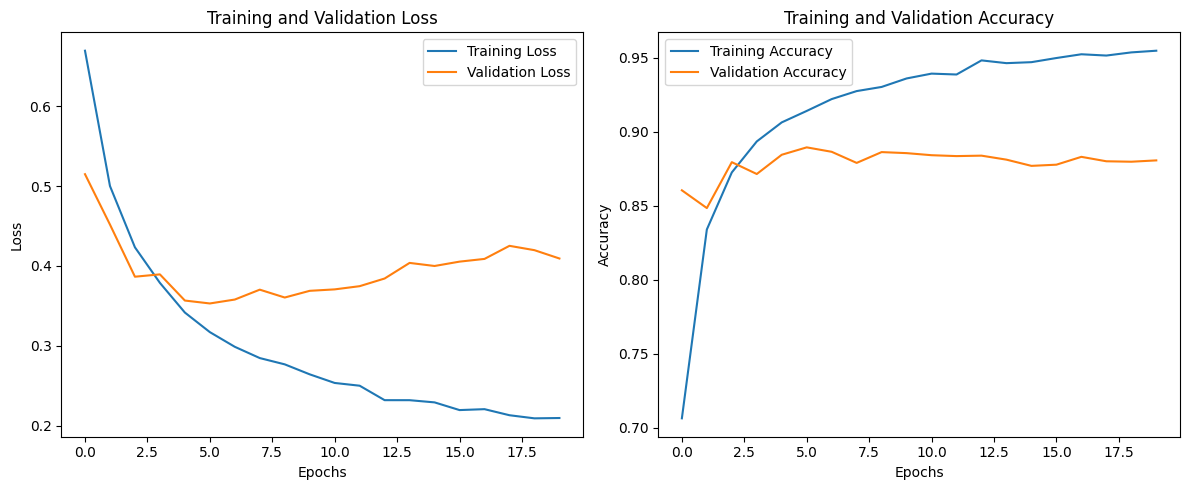

In [7]:
model_4 = keras.Sequential([
    keras.layers.Dense(16,
                       kernel_regularizer=regularizers.l2(0.002),
                       activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16,
                       kernel_regularizer=regularizers.l2(0.002),
                       activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])
model_4.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model_4.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

plt = generate_plot(history_original)
plt.show()

Epoch 1/20
30/30 [==============================] - 3s 63ms/step - loss: 0.6971 - accuracy: 0.6839 - val_loss: 0.5752 - val_accuracy: 0.8507
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5397 - accuracy: 0.8166 - val_loss: 0.4638 - val_accuracy: 0.8702
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4507 - accuracy: 0.8612 - val_loss: 0.4006 - val_accuracy: 0.8788
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.4008 - accuracy: 0.8845 - val_loss: 0.4222 - val_accuracy: 0.8511


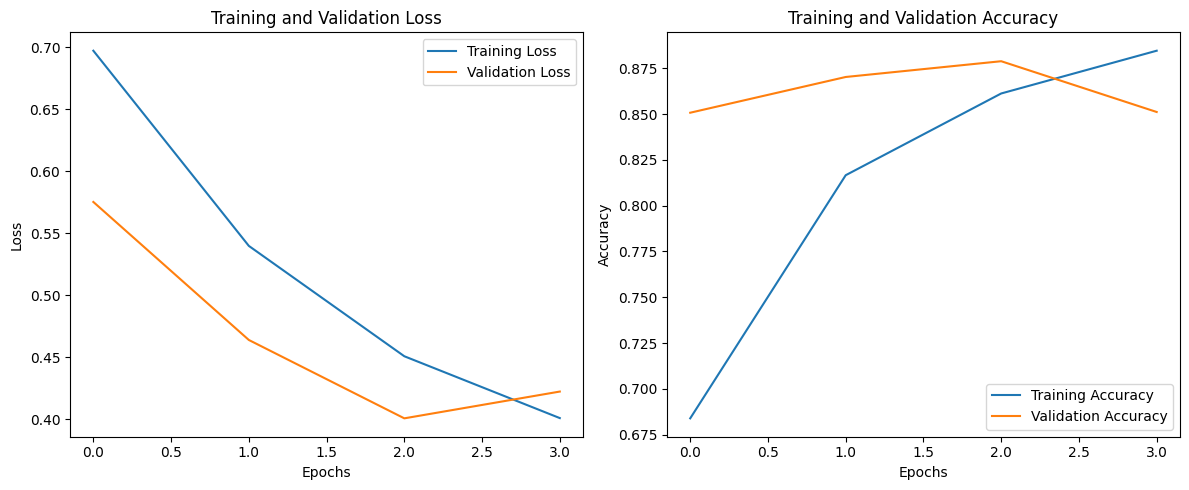

In [11]:
# add early stopping
callback = tf.keras.callbacks.EarlyStopping()

model_5 = keras.Sequential([
    keras.layers.Dense(16,
                       kernel_regularizer=regularizers.l2(0.002),
                       activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16,
                       kernel_regularizer=regularizers.l2(0.002),
                       activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])
model_5.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model_5.fit(train_data, train_labels,
                            epochs=20, batch_size=512, validation_split=0.4,
                            callbacks=[callback])

plt = generate_plot(history_original)
plt.show()